In [3]:
from datetime import datetime
import numpy as np
import pandas as pd
import flowcept.analytics as analytics
import flowcept.analytics.plot as flow_plot
from flowcept import TaskQueryAPI

In [34]:
def ingest_mock_data():
    """
    This function is here just to enable the execution of the functions we are showing in this notebook.
    """
    import json
    from uuid import uuid4
    from flowcept import DBAPI
    db_api = DBAPI()
    test_data_path = '../tests/api/sample_data_with_telemetry_and_rai.json' # This sample data contains a workflow composed of 9 tasks.
    with open(test_data_path) as f:
        base_data = json.loads(f.read())
    
    docs = []
    wf_id = str(uuid4())
    for d in base_data:
        new_doc = d.copy()
        new_doc.pop("_id")
        new_doc["task_id"] = str(uuid4())
        new_doc["workflow_id"] = wf_id
        docs.append(new_doc)
    
    inserted_ids = db_api._dao.insert_many(docs)
    assert len(inserted_ids) == len(base_data)
    return wf_id

In [35]:
# Need to run only if this is the first time.
#wf_id = ingest_mock_data()
#wf_id

'e02f8776-3777-4856-952b-5b0cfbed2165'

In [2]:
wf_id = '100faab4-ff4c-4f78-92a7-6f20ec1fad83'

In [3]:
query_api = TaskQueryAPI()

## Very Simple query returning a DataFrame

In [5]:
_filter = {
    "workflow_id": wf_id
}
df = query_api.df_query(_filter, calculate_telemetry_diff=True)

In [6]:
df.head(3)

,task_id,submitted_at,activity_id,workflow_id,utc_timestamp,adapter_id,user,campaign_id,sys_name,node_name,...,telemetry_diff.network.netio_per_interface.bridge100.bytes_sent,telemetry_diff.network.netio_per_interface.bridge100.bytes_recv,telemetry_diff.network.netio_per_interface.bridge100.packets_sent,telemetry_diff.network.netio_per_interface.bridge100.packets_recv,telemetry_diff.network.netio_per_interface.bridge100.errin,telemetry_diff.network.netio_per_interface.bridge100.errout,telemetry_diff.network.netio_per_interface.bridge100.dropin,telemetry_diff.network.netio_per_interface.bridge100.dropout,status,elapsed_time
0,6b1209fe-e078-4572-b082-db14d0de025e,2024-02-09 01:05:28.202881024,wrapper,100faab4-ff4c-4f78-92a7-6f20ec1fad83,2024-02-09 01:06:27.422988032,dask,root,super_campaign,Darwin,MAC132633,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,FINISHED,59.133646
1,8646acc7-bdd7-4504-bfb4-3768b97912d6,2024-02-09 01:05:28.206701056,wrapper,100faab4-ff4c-4f78-92a7-6f20ec1fad83,2024-02-09 01:06:29.350380800,dask,root,super_campaign,Darwin,MAC132633,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,FINISHED,61.062001
2,d36a4538-7e52-49df-b8c9-332506160d5b,2024-02-09 01:05:28.210365952,wrapper,100faab4-ff4c-4f78-92a7-6f20ec1fad83,2024-02-09 01:08:17.270892032,dask,root,super_campaign,Darwin,MAC132633,...,1024.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,FINISHED,168.981788


## Cleaning DataFrame

In [7]:
cleaned_df = analytics.clean_dataframe(
                        df,
                        keep_non_numeric_columns=False,
                        keep_only_nans_columns=False,
                        keep_task_id=False,
                        keep_telemetry_percent_columns=False,
                        sum_lists=True,
                        aggregate_telemetry=True)
cleaned_df.head()

Number of columns originally: 334
Number of columns later: 39


,used.max_epochs,generated.loss,generated.accuracy,generated.responsible_ai_metrics.shap_sum,generated.responsible_ai_metrics.flops,generated.responsible_ai_metrics.params,generated.responsible_ai_metrics.max_width,generated.responsible_ai_metrics.depth,generated.responsible_ai_metrics.n_fc_layers,generated.responsible_ai_metrics.n_cv_layers,...,telemetry_diff.memory.swap.sout,telemetry_diff.disk.disk_usage.free,used.conv_in_outs_sum,used.conv_kernel_sizes_sum,used.conv_pool_sizes_sum,used.fc_in_outs_sum,used.softmax_dims_sum,telemetry_diff.network.activity,telemetry_diff.disk.activity,telemetry_diff.process.activity
0,1.0,0.014729,40.75,0.0,2.188019e+07,162990.0,100.0,12.0,5.0,7.0,...,5390336.0,-1.067229e+09,41.0,29.0,2.0,220.0,1.0,156472.4375,1.714730e+08,1997778.0
1,1.0,0.040326,11.35,0.0,4.727514e+07,359840.0,400.0,16.0,9.0,7.0,...,5390336.0,-1.067397e+09,41.0,29.0,2.0,1620.0,3.0,162635.8125,1.724063e+08,2044184.0
2,1.0,0.058157,11.35,0.0,5.405073e+09,42184840.0,4000.0,24.0,17.0,7.0,...,14172160.0,-1.065861e+09,41.0,29.0,2.0,32020.0,7.0,369630.8125,2.518569e+08,4531840.0
3,1.0,0.018242,10.28,0.0,3.241957e+08,1890690.0,100.0,16.0,5.0,11.0,...,21512192.0,-1.069761e+09,181.0,30.0,3.0,260.0,1.0,650028.6250,2.726195e+08,6284750.0
4,1.0,0.040312,11.35,0.0,3.498467e+08,2089540.0,400.0,20.0,9.0,11.0,...,22134784.0,-1.070207e+09,181.0,30.0,3.0,1660.0,3.0,652738.7500,2.752950e+08,6311004.0


In [40]:
sort = [
    ("generated.loss", TaskQueryAPI.ASC),
    ("generated.responsible_ai_metrics.params", TaskQueryAPI.ASC),
]
df = query_api.df_get_top_k_tasks(
    filter=_filter,
    calculate_telemetry_diff=False,
    sort=sort,
    k=3,
)
df.filter(regex='used[.]|generated[.]')

,used.conv_in_outs,used.conv_kernel_sizes,used.conv_pool_sizes,used.fc_in_outs,used.softmax_dims,used.max_epochs,generated.loss,generated.accuracy,generated.responsible_ai_metrics.shap_sum,generated.responsible_ai_metrics.flops,generated.responsible_ai_metrics.params,generated.responsible_ai_metrics.max_width,generated.responsible_ai_metrics.depth,generated.responsible_ai_metrics.n_fc_layers,generated.responsible_ai_metrics.n_cv_layers,generated.responsible_ai_metrics.convolutional_layers,generated.responsible_ai_metrics.fully_connected_layers
0,"[[1, 10], [10, 20]]","[1, 28]","[1, 1]","[[20, 50], [50, 100]]","[None, 1]",1,0.014729,40.75,0.0,2.188019e+07,162990.0,100.0,12.0,5.0,7.0,"Sequential(\n (0): Conv2d(1, 10, kernel_size=...","Sequential(\n (0): Linear(in_features=20, out..."
6,"[[1, 30], [30, 60], [60, 90], [90, 120]]","[1, 1, 1, 28]","[1, 1, 1, 1]","[[120, 50], [50, 100]]","[None, 1]",1,0.018208,10.09,0.0,1.810793e+09,8485880.0,120.0,20.0,5.0,15.0,"Sequential(\n (0): Conv2d(1, 30, kernel_size=...","Sequential(\n (0): Linear(in_features=120, ou..."
3,"[[1, 20], [20, 40], [40, 60]]","[1, 1, 28]","[1, 1, 1]","[[60, 50], [50, 100]]","[None, 1]",1,0.018242,10.28,0.0,3.241957e+08,1890690.0,100.0,16.0,5.0,11.0,"Sequential(\n (0): Conv2d(1, 20, kernel_size=...","Sequential(\n (0): Linear(in_features=60, out..."


## Query Returning the Top K tasks using quantile thresholds

This query filters values based on quantiles (list only ocurrences with cpu_times < 50% quantile, i.e., median) then sort by cpu, loss, and flops.

In [41]:
clauses = [
    ("telemetry_diff.process.cpu_times.user", "<", 0.5),
]
sort = [
    ("telemetry_diff.process.cpu_times.user", TaskQueryAPI.ASC),
    ("generated.loss", TaskQueryAPI.ASC),
    ("generated.responsible_ai_metrics.flops", TaskQueryAPI.ASC),
]
df = query_api.df_get_tasks_quantiles(
    clauses=clauses,
    filter=_filter,
    sort=sort,
    calculate_telemetry_diff=True,
    clean_dataframe=True,
)
df

Number of columns originally: 334
Number of columns later: 58


,used.max_epochs,generated.loss,generated.accuracy,generated.responsible_ai_metrics.shap_sum,generated.responsible_ai_metrics.flops,generated.responsible_ai_metrics.params,generated.responsible_ai_metrics.max_width,generated.responsible_ai_metrics.depth,generated.responsible_ai_metrics.n_fc_layers,generated.responsible_ai_metrics.n_cv_layers,...,telemetry_diff.network.netio_per_interface.en0.bytes_sent,telemetry_diff.network.netio_per_interface.en0.packets_sent,telemetry_diff.network.netio_per_interface.utun4.bytes_sent,telemetry_diff.network.netio_per_interface.utun4.bytes_recv,telemetry_diff.network.netio_per_interface.utun4.packets_sent,telemetry_diff.network.netio_per_interface.utun4.packets_recv,telemetry_diff.network.netio_per_interface.vmenet0.bytes_sent,telemetry_diff.network.netio_per_interface.vmenet0.packets_sent,telemetry_diff.network.netio_per_interface.bridge100.bytes_sent,telemetry_diff.network.netio_per_interface.bridge100.packets_sent
0,1.0,0.014729,40.75,0.0,2.188019e+07,162990.0,100.0,12.0,5.0,7.0,...,243712.0,534.0,199680.0,205824.0,507.0,780.0,0.0,1.0,0.0,2.0
1,1.0,0.040326,11.35,0.0,4.727514e+07,359840.0,400.0,16.0,9.0,7.0,...,245760.0,546.0,200704.0,208896.0,519.0,806.0,0.0,1.0,0.0,2.0
2,1.0,0.058157,11.35,0.0,5.405073e+09,42184840.0,4000.0,24.0,17.0,7.0,...,626688.0,1355.0,514048.0,493568.0,1288.0,1960.0,0.0,5.0,1024.0,10.0
3,1.0,0.018242,10.28,0.0,3.241957e+08,1890690.0,100.0,16.0,5.0,11.0,...,1671168.0,2556.0,812032.0,799744.0,1994.0,3078.0,1024.0,10.0,2048.0,20.0


## Correlation Analysis

#### Using Pandas' correlation 

In [42]:
df.corr()

,used.max_epochs,generated.loss,generated.accuracy,generated.responsible_ai_metrics.shap_sum,generated.responsible_ai_metrics.flops,generated.responsible_ai_metrics.params,generated.responsible_ai_metrics.max_width,generated.responsible_ai_metrics.depth,generated.responsible_ai_metrics.n_fc_layers,generated.responsible_ai_metrics.n_cv_layers,...,telemetry_diff.network.netio_per_interface.en0.bytes_sent,telemetry_diff.network.netio_per_interface.en0.packets_sent,telemetry_diff.network.netio_per_interface.utun4.bytes_sent,telemetry_diff.network.netio_per_interface.utun4.bytes_recv,telemetry_diff.network.netio_per_interface.utun4.packets_sent,telemetry_diff.network.netio_per_interface.utun4.packets_recv,telemetry_diff.network.netio_per_interface.vmenet0.bytes_sent,telemetry_diff.network.netio_per_interface.vmenet0.packets_sent,telemetry_diff.network.netio_per_interface.bridge100.bytes_sent,telemetry_diff.network.netio_per_interface.bridge100.packets_sent
used.max_epochs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generated.loss,NaN,1.000000,-0.570400,NaN,0.819808,0.823472,0.868819,0.896128,9.669773e-01,-0.479819,...,-0.271887,-0.149934,-0.055562,-0.080247,-0.043729,-0.053281,-0.479819,-0.116829,-6.767772e-02,-0.116829
generated.accuracy,NaN,-0.570400,1.000000,NaN,-0.345728,-0.338603,-0.349589,-0.649192,-4.485456e-01,-0.365087,...,-0.477162,-0.525894,-0.551055,-0.546526,-0.557710,-0.557186,-0.365087,-0.533059,-5.469569e-01,-0.533059
generated.responsible_ai_metrics.shap_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generated.responsible_ai_metrics.flops,NaN,0.819808,-0.345728,NaN,1.000000,0.999893,0.994233,0.936884,9.340567e-01,-0.284137,...,-0.017697,0.126500,0.237711,0.207800,0.247957,0.235496,-0.284137,0.168233,2.247585e-01,0.168233
generated.responsible_ai_metrics.params,NaN,0.823472,-0.338603,NaN,0.999893,1.000000,0.995420,0.934735,9.370909e-01,-0.298127,...,-0.032316,0.111981,0.223482,0.193474,0.233764,0.221259,-0.298127,0.153800,2.104857e-01,0.153800
generated.responsible_ai_metrics.max_width,NaN,0.868819,-0.349589,NaN,0.994233,0.995420,1.000000,0.938519,9.649505e-01,-0.367405,...,-0.106128,0.038137,0.150285,0.120129,0.161027,0.148537,-0.367405,0.079860,1.370506e-01,0.079860
generated.responsible_ai_metrics.depth,NaN,0.896128,-0.649192,NaN,0.936884,0.934735,0.938519,1.000000,9.365858e-01,-0.132453,...,0.122945,0.258013,0.358005,0.331935,0.368981,0.358651,-0.132453,0.294547,3.458572e-01,0.294547
generated.responsible_ai_metrics.n_fc_layers,NaN,0.966977,-0.448546,NaN,0.934057,0.937091,0.964951,0.936586,1.000000e+00,-0.471405,...,-0.231315,-0.093979,0.013152,-0.015365,0.024821,0.013332,-0.471405,-0.055174,1.639908e-16,-0.055174
generated.responsible_ai_metrics.n_cv_layers,NaN,-0.479819,-0.365087,NaN,-0.284137,-0.298127,-0.367405,-0.132453,-4.714045e-01,1.000000,...,0.963662,0.915132,0.863758,0.878808,0.858377,0.864876,1.000000,0.897315,8.703883e-01,0.897315


#### Using FlowCept's functions for correlations

In [43]:
df = query_api.df_query(_filter, calculate_telemetry_diff=True)
df = analytics.clean_dataframe(df, aggregate_telemetry=True, sum_lists=True)

Number of columns originally: 334
Number of columns later: 39


##### All correlations

In [44]:
analytics.analyze_correlations(df)

,col_1,col_2,correlation
0,generated.loss,generated.accuracy,0.18
1,generated.loss,generated.responsible_ai_metrics.flops,0.43
2,generated.loss,generated.responsible_ai_metrics.params,0.43
3,generated.loss,generated.responsible_ai_metrics.max_width,0.83
4,generated.loss,generated.responsible_ai_metrics.depth,0.49
...,...,...,...
625,used.softmax_dims_sum,telemetry_diff.disk.activity,0.04
626,used.softmax_dims_sum,telemetry_diff.process.activity,-0.10
627,telemetry_diff.network.activity,telemetry_diff.disk.activity,0.93
628,telemetry_diff.network.activity,telemetry_diff.process.activity,1.00


##### Only correlations >= 0.9 (absolute) and using a different method

In [45]:
analytics.analyze_correlations(df, method='spearman', threshold=0.9)

,col_1,col_2,correlation
0,generated.loss,generated.responsible_ai_metrics.max_width,0.93
1,generated.loss,generated.responsible_ai_metrics.n_fc_layers,0.94
2,generated.loss,used.softmax_dims_sum,0.94
3,generated.responsible_ai_metrics.flops,generated.responsible_ai_metrics.params,1.00
4,generated.responsible_ai_metrics.flops,generated.responsible_ai_metrics.depth,0.98
...,...,...,...
176,used.conv_pool_sizes_sum,telemetry_diff.disk.activity,0.94
177,used.fc_in_outs_sum,used.softmax_dims_sum,0.95
178,telemetry_diff.network.activity,telemetry_diff.disk.activity,0.98
179,telemetry_diff.network.activity,telemetry_diff.process.activity,1.00


In [46]:
analytics.analyze_correlations_between(df, col_pattern1="generated.", col_pattern2="used.", threshold=0.5)

,col_1,col_2,correlation
2,generated.loss,used.fc_in_outs_sum,0.64
3,generated.loss,used.softmax_dims_sum,0.87
8,generated.accuracy,used.conv_in_outs_sum,-0.57
9,generated.accuracy,used.conv_kernel_sizes_sum,-0.57
10,generated.accuracy,used.conv_pool_sizes_sum,-0.57
25,generated.responsible_ai_metrics.flops,used.fc_in_outs_sum,0.79
26,generated.responsible_ai_metrics.flops,used.softmax_dims_sum,0.62
41,generated.responsible_ai_metrics.params,used.fc_in_outs_sum,0.79
42,generated.responsible_ai_metrics.params,used.softmax_dims_sum,0.62
47,generated.responsible_ai_metrics.max_width,used.fc_in_outs_sum,0.91


In [47]:
analytics.analyze_correlations_used_vs_generated(df, threshold=0.8)

,col_1,col_2,correlation
2,generated.loss,used.softmax_dims_sum,0.87
7,generated.responsible_ai_metrics.max_width,used.fc_in_outs_sum,0.91
8,generated.responsible_ai_metrics.max_width,used.softmax_dims_sum,0.96
9,generated.responsible_ai_metrics.depth,used.fc_in_outs_sum,0.87
10,generated.responsible_ai_metrics.n_fc_layers,used.fc_in_outs_sum,0.87
11,generated.responsible_ai_metrics.n_fc_layers,used.softmax_dims_sum,1.00
26,generated.responsible_ai_metrics.n_cv_layers,used.conv_in_outs_sum,1.00
27,generated.responsible_ai_metrics.n_cv_layers,used.conv_kernel_sizes_sum,1.00
28,generated.responsible_ai_metrics.n_cv_layers,used.conv_pool_sizes_sum,1.00


In [48]:
analytics.analyze_correlations_used_vs_telemetry_diff(df, threshold=0.8)

,col_1,col_2,correlation
42,telemetry_diff.cpu.times_avg.user,used.conv_in_outs_sum,0.87
43,telemetry_diff.cpu.times_avg.user,used.conv_kernel_sizes_sum,0.87
44,telemetry_diff.cpu.times_avg.user,used.conv_pool_sizes_sum,0.87
57,telemetry_diff.cpu.times_avg.system,used.conv_in_outs_sum,0.87
58,telemetry_diff.cpu.times_avg.system,used.conv_kernel_sizes_sum,0.87
59,telemetry_diff.cpu.times_avg.system,used.conv_pool_sizes_sum,0.87
71,telemetry_diff.cpu.times_avg.idle,used.conv_in_outs_sum,0.87
72,telemetry_diff.cpu.times_avg.idle,used.conv_kernel_sizes_sum,0.87
73,telemetry_diff.cpu.times_avg.idle,used.conv_pool_sizes_sum,0.87
84,telemetry_diff.process.memory.rss,used.conv_in_outs_sum,-0.87


In [49]:
analytics.analyze_correlations_generated_vs_telemetry_diff(df, threshold=0.8)

,col_1,col_2,correlation
12,generated.responsible_ai_metrics.n_cv_layers,telemetry_diff.cpu.times_avg.user,0.87
13,generated.responsible_ai_metrics.n_cv_layers,telemetry_diff.cpu.times_avg.system,0.87
14,generated.responsible_ai_metrics.n_cv_layers,telemetry_diff.cpu.times_avg.idle,0.87
15,generated.responsible_ai_metrics.n_cv_layers,telemetry_diff.process.memory.rss,-0.87
16,generated.responsible_ai_metrics.n_cv_layers,telemetry_diff.process.memory.pfaults,0.87
17,generated.responsible_ai_metrics.n_cv_layers,telemetry_diff.process.cpu_times.user,0.87
18,generated.responsible_ai_metrics.n_cv_layers,telemetry_diff.process.cpu_times.system,0.87
19,generated.responsible_ai_metrics.n_cv_layers,telemetry_diff.memory.virtual.used,0.88
20,generated.responsible_ai_metrics.n_cv_layers,telemetry_diff.memory.virtual.active,0.88
21,generated.responsible_ai_metrics.n_cv_layers,telemetry_diff.memory.virtual.inactive,0.87


In [50]:
analytics.describe_col(df, col='generated.loss')

{'label': 'generated.loss',
 'mean': '0.04',
 'std': '0.02',
 'min': '0.01',
 '25%': '0.02',
 '50%': '0.04',
 '75%': '0.04',
 'max': '0.06'}

In [51]:
analytics.describe_cols(df, cols=['generated.loss','generated.responsible_ai_metrics.params'], col_labels=['Loss', '#Params'])

,label,mean,std,min,25%,50%,75%,max
0,Loss,0.04,0.02,0.01,0.02,0.04,0.04,0.06
1,#Params,13.47M,18.57M,162.99K,1.51M,5.29M,17.06M,43.93M


## Plots

In [52]:
_filter = {
    "workflow_id": wf_id
}
df = query_api.df_query(_filter, calculate_telemetry_diff=True, clean_dataframe=True, sum_lists=True, aggregate_telemetry=True)

Number of columns originally: 334
Number of columns later: 39


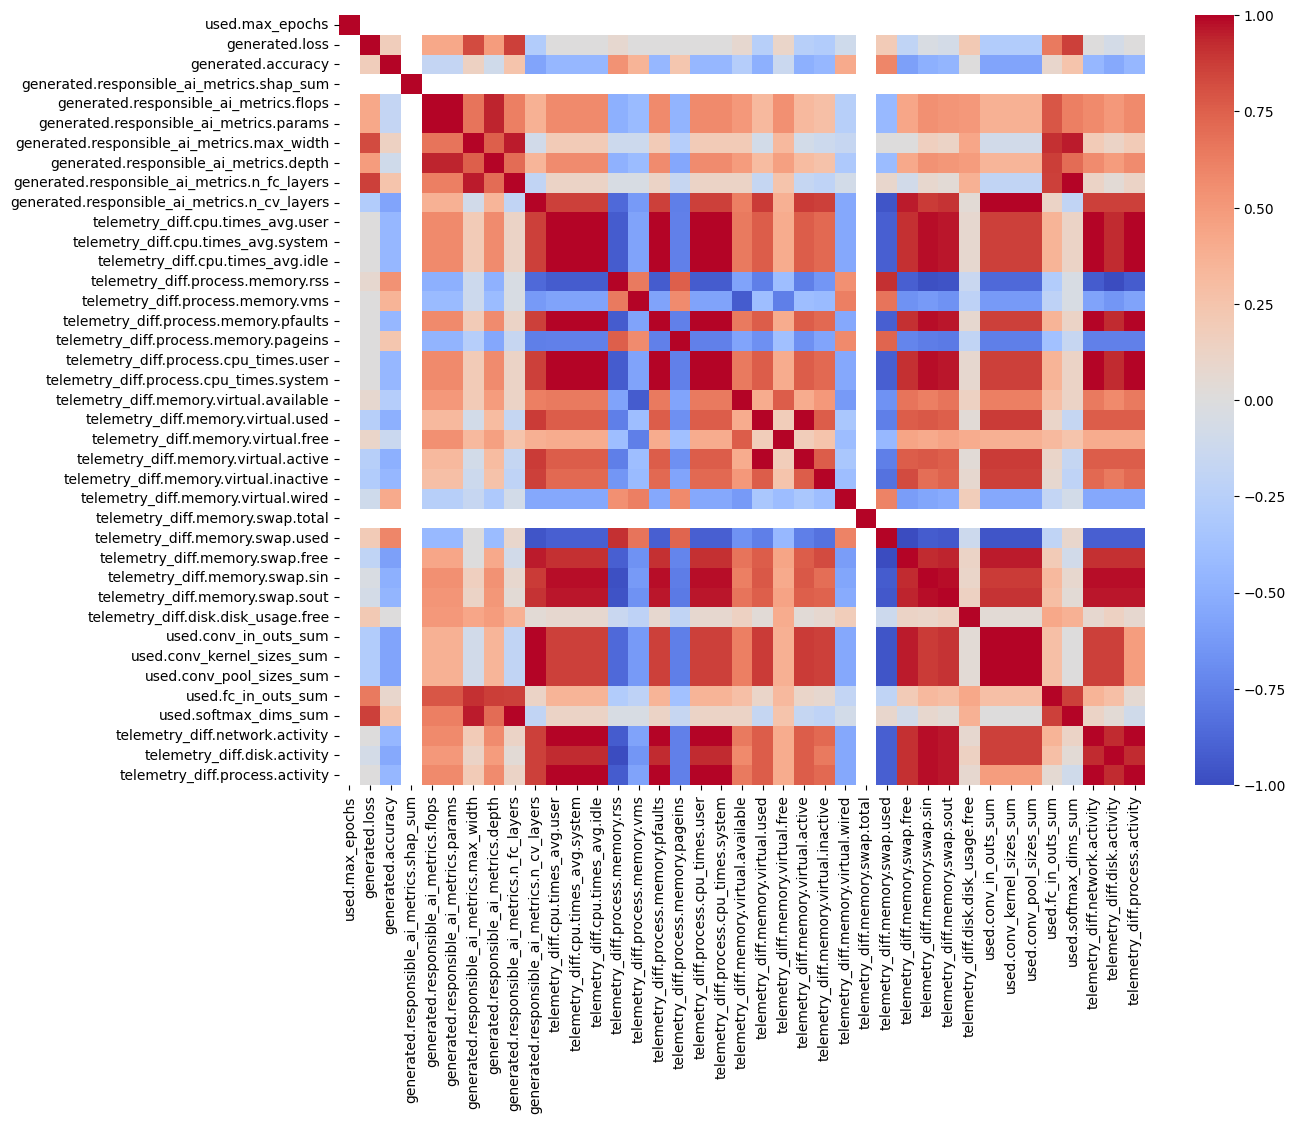

In [53]:
flow_plot.heatmap(df)

## Plotting relevant 'candidates' and comparing it with the `query_api.df_get_tasks_quantiles` function. 

In [10]:
df.to_csv('sample_data.csv')

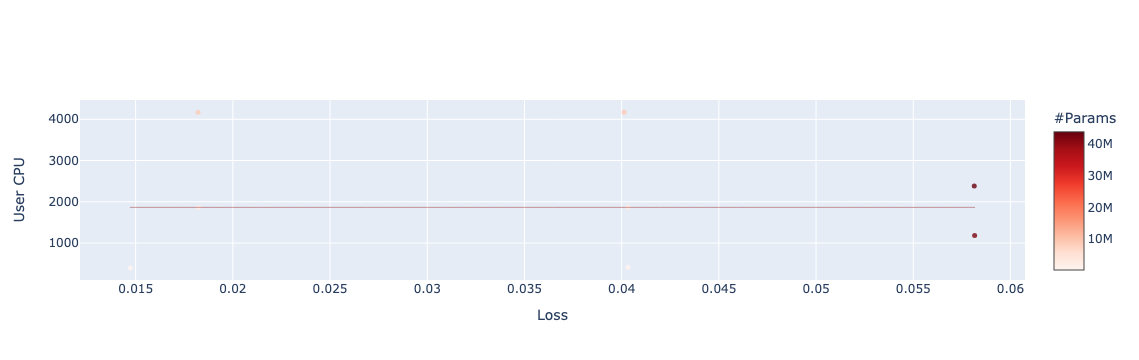

In [9]:
x_col = 'generated.loss'
y_col = 'telemetry_diff.cpu.times_avg.user'
color_col = 'generated.responsible_ai_metrics.params'
flow_plot.scatter2d_with_colors(df,
                                x_col='generated.loss',
                                y_col='telemetry_diff.cpu.times_avg.user',
                                color_col='generated.responsible_ai_metrics.params',
                                x_label='Loss',
                                y_label='User CPU',                                
                                color_label='#Params',
                                xaxis_title='Loss',
                                yaxis_title='User CPU',
                                plot_horizon_line=True,
                                horizon_quantile=0.5,
                                plot_pareto=False)

In [55]:
clauses = [
    (y_col, "<=", 0.5),
]
sort = [
    (y_col, TaskQueryAPI.ASC),
    (x_col, TaskQueryAPI.ASC),
    (color_col, TaskQueryAPI.ASC),
]
df = query_api.df_get_tasks_quantiles(
    clauses=clauses,
    filter=_filter,
    sort=sort,
    calculate_telemetry_diff=True,
)
df[['task_id', x_col, y_col, color_col]]

,task_id,generated.loss,telemetry_diff.cpu.times_avg.user,generated.responsible_ai_metrics.params
0,4c31962e-4b36-4179-887a-605ac636cf3d,0.014729,397.45,162990.0
1,e30b1584-015d-4736-ad3a-c300cb57f602,0.040326,411.42,359840.0
2,c4b82fb9-62f4-4d9e-ad18-dee40433356c,0.058157,1179.76,42184840.0
3,4fccd55d-29f4-48b9-b029-e6382c45e74e,0.018242,1862.61,1890690.0


### Show everything we captured about that 'good' candidate, highlighted in the pareto front blue dot in the plot above.

In [56]:
df.query(f"task_id == '{df.head(1)['task_id'].values[0]}'") 

,task_id,submitted_at,activity_id,workflow_id,utc_timestamp,adapter_id,user,campaign_id,sys_name,node_name,...,telemetry_diff.network.netio_per_interface.bridge100.bytes_sent,telemetry_diff.network.netio_per_interface.bridge100.bytes_recv,telemetry_diff.network.netio_per_interface.bridge100.packets_sent,telemetry_diff.network.netio_per_interface.bridge100.packets_recv,telemetry_diff.network.netio_per_interface.bridge100.errin,telemetry_diff.network.netio_per_interface.bridge100.errout,telemetry_diff.network.netio_per_interface.bridge100.dropin,telemetry_diff.network.netio_per_interface.bridge100.dropout,status,elapsed_time
0,4c31962e-4b36-4179-887a-605ac636cf3d,2024-02-09 01:05:28.202881024,wrapper,e02f8776-3777-4856-952b-5b0cfbed2165,2024-02-09 01:06:27.422988032,dask,root,super_campaign,Darwin,MAC132633,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,FINISHED,59.133646


### Find Interesting Tasks with data that are sensitve according to correlations

In [ ]:
result = query_api.find_interesting_tasks_based_on_correlations_generated_and_telemetry_data(filter=_filter)

In [ ]:
task_id, res = next(iter(result.items()))
res

### Finding Tasks with Outlier Data

In [ ]:
tasks_with_outliers = query_api.df_find_outliers(
    outlier_threshold=5,
    calculate_telemetry_diff=True,
    filter=_filter,
    clean_dataframe=True,
    keep_task_id=True
)

In [ ]:
selected_columns = set(tasks_with_outliers['outlier_columns'].explode())
selected_columns.add("task_id")
selected_columns.add("outlier_columns")
result_df = tasks_with_outliers.loc[:, tasks_with_outliers.columns.isin(selected_columns)]
result_df